# Data Reading

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Mounting colab with google drive to access the csv from there

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the file

appliances = pd.read_csv("/content/drive/MyDrive/energy_dataset.csv")

# EDA

In [4]:
# Reading head

appliances.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
# Checking number of rows and columns 

appliances.shape

(19735, 29)

In [6]:
# Checking datatypes

appliances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [7]:
# Checking null values

appliances.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
# Analyzing statistics on features

appliances.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Car price data distribution')

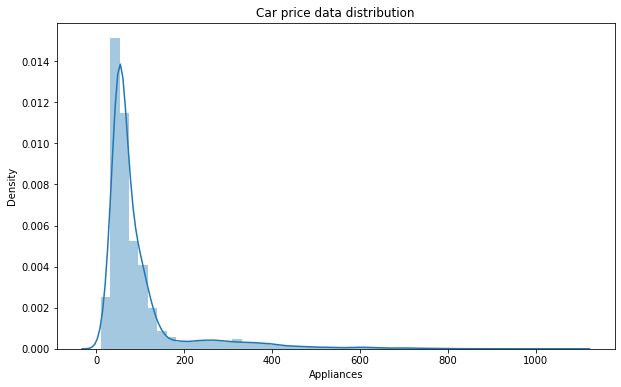

In [9]:
# Analysing distribution of target variable - Appliances

fig=plt.figure(figsize=(10,6))
sns.distplot(appliances['Appliances'])
plt.title("Car price data distribution")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22bc9fb9d0>,
      dtype=object)

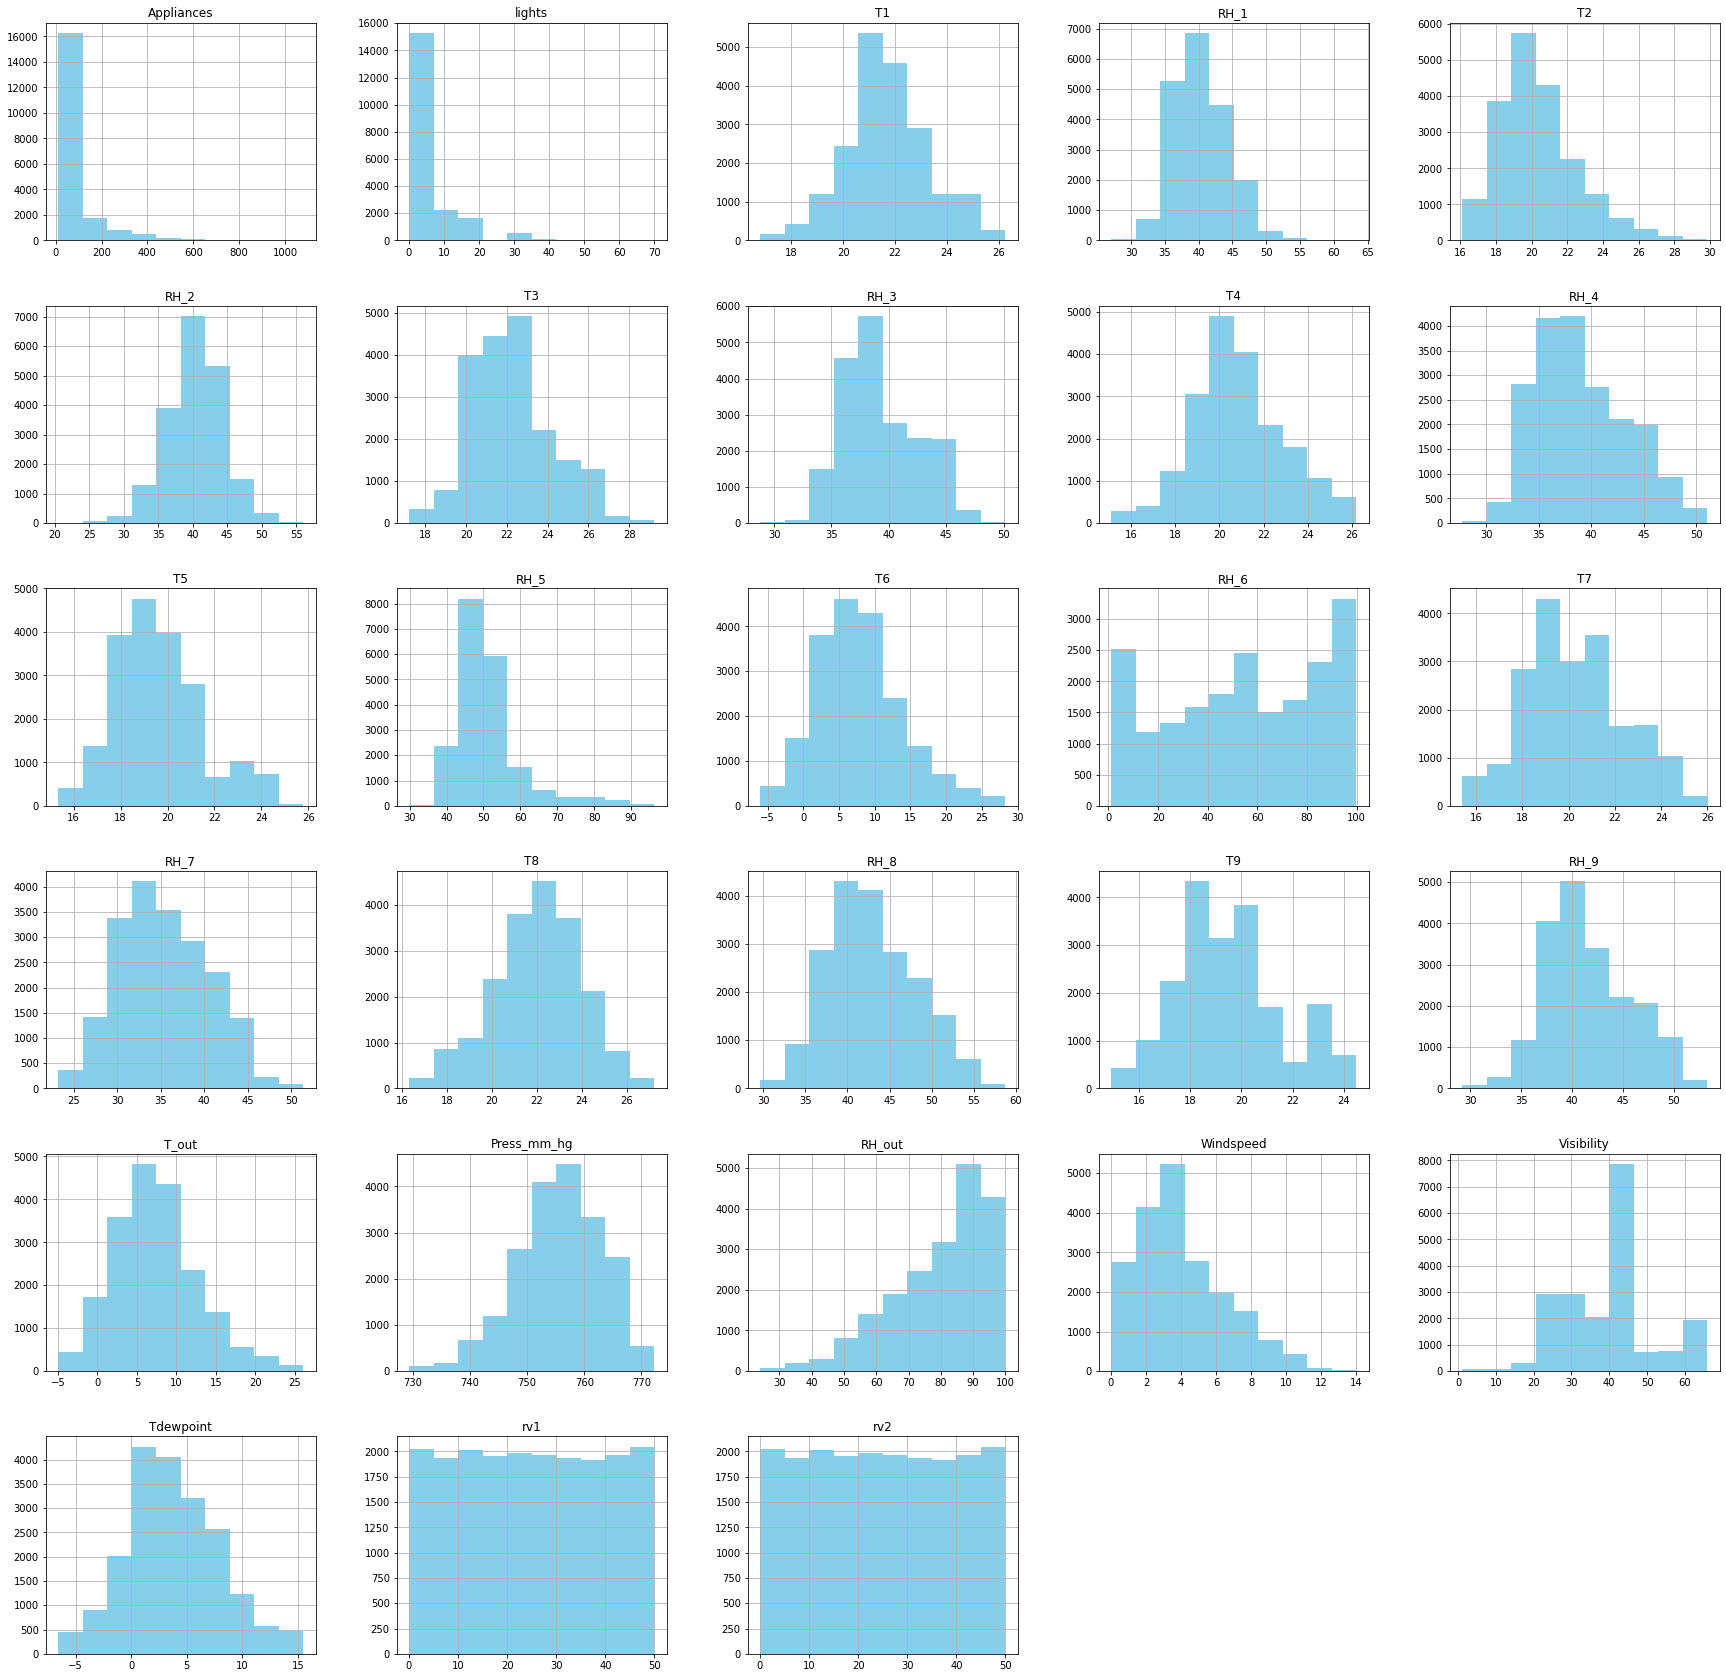

In [10]:
# Checking distribution of all features

appliances.hist(figsize=(30,30), color = 'skyblue')

# Data Preparation

In [11]:
# Dropping date column fron dataframe

appliances.drop('date', axis=1, inplace=True)

In [12]:
# Checking unique values in each column

for col in appliances:
    print(col)
    print("\n")
    print(appliances[col].unique())
    print("\n\n")

Appliances


[  60   50   70  230  580  430  250  100   90   80  140  120  190  110
  400  390  240   40   30  310  380  370   20  260  500  450  220  170
  290  130  200  210  180  350  300  340  150  330  420  520  360  270
  550  690  620  610  490  410  320  740  910  510  790  460  160  480
  280  560 1080  750  470  440  800  540  530  660  630  600   10  570
  830 1070  890  590  850  710  680  670  780  640  650  700  770  720
  760  860  880  730  900  820  870  840]



lights


[30 40 50 70 60 10 20  0]



T1


[19.89       19.85666667 19.79       19.92666667 20.06666667 20.13333333
 20.26       20.42666667 20.56666667 20.73       20.85666667 20.89
 20.96333333 21.03333333 21.1        21.13333333 21.2        21.29
 21.35666667 21.39       21.5        21.53333333 21.6        21.26
 21.16666667 21.075      21.         20.92666667 20.79       20.7
 20.6        20.5        20.39       20.29       20.23       20.2
 20.16666667 20.1        20.03333333 20.         19.82333333 19.76


# Feature Engineering

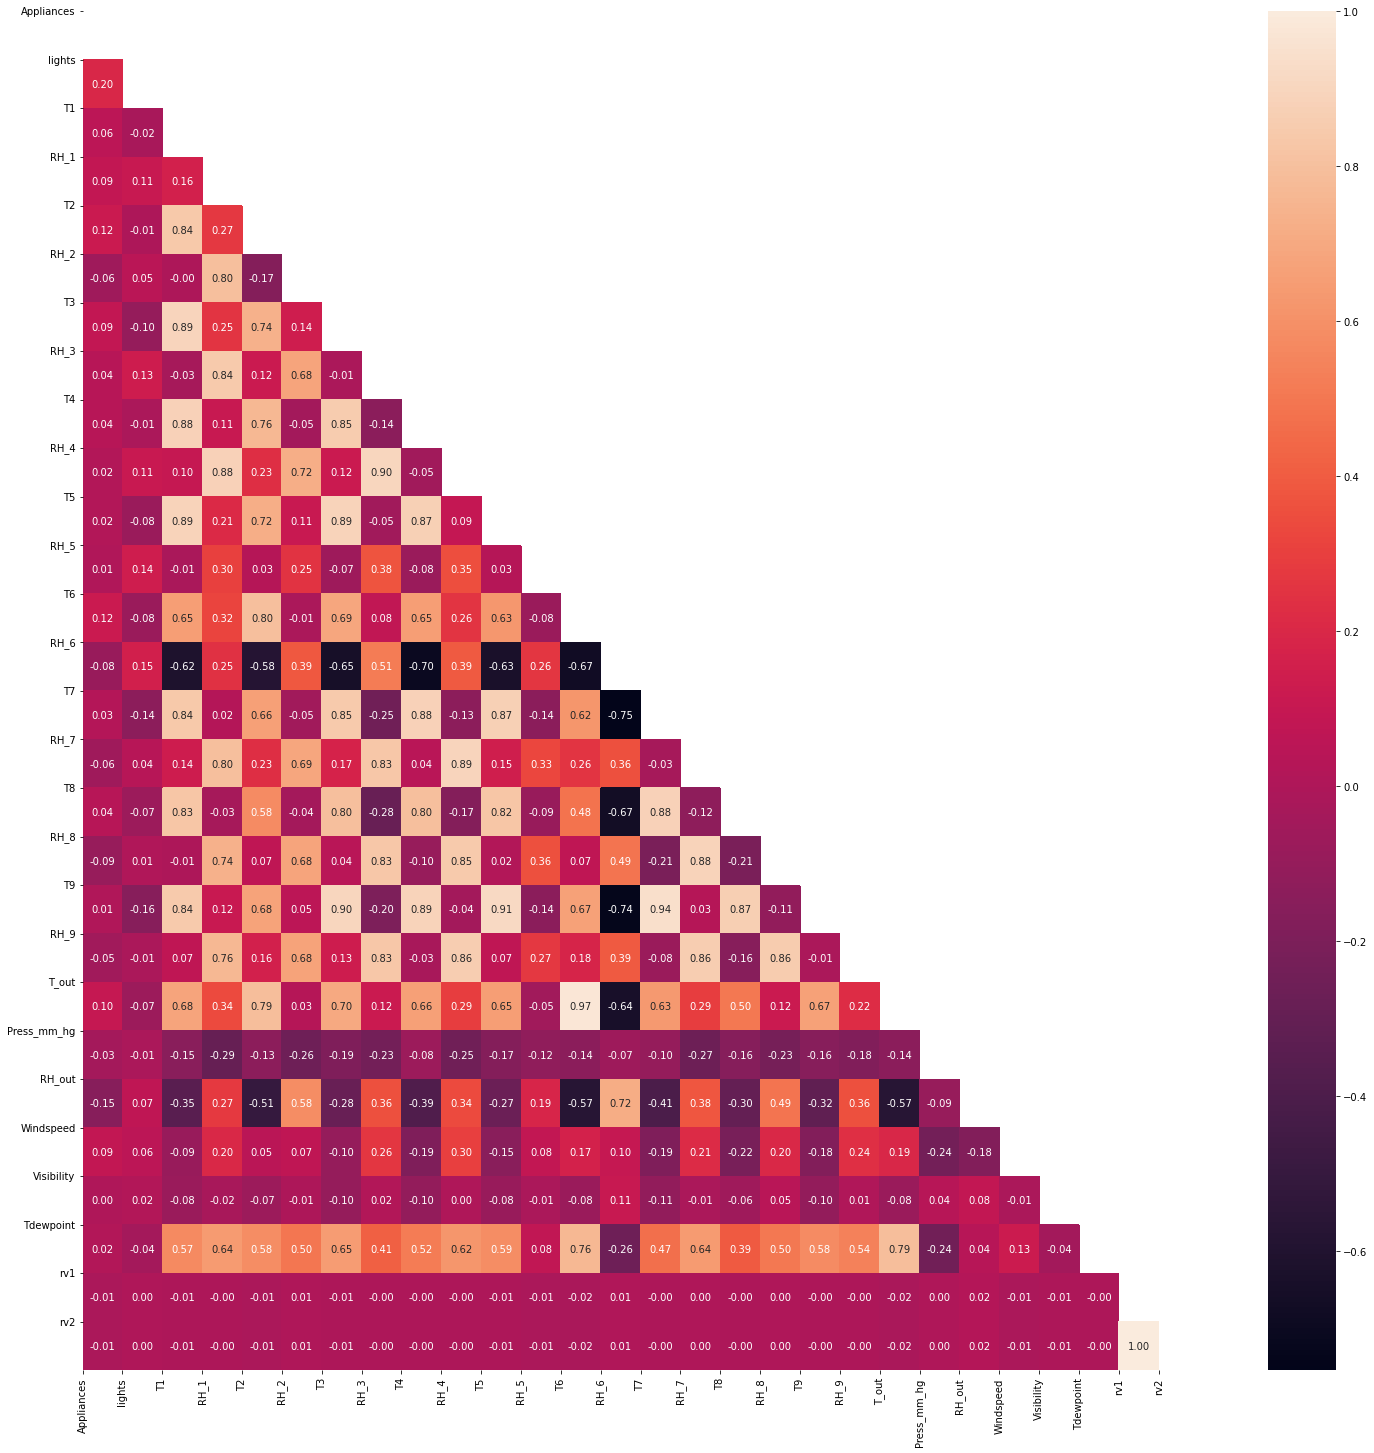

In [13]:
# Getting correlation between features

corr = appliances.corr()

# Masking repeated values

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 25))

# Plotting heat map

sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)

# Applying xticks

plt.xticks(range(len(corr.columns)), corr.columns);

# Applying yticks

plt.yticks(range(len(corr.columns)), corr.columns)

# Displaying plot

plt.show()


In [15]:
# Listing down the columns of the dataframe

list(appliances.columns)

['Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [16]:
# Splitting list of columns into features and target 

features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

target = ['Appliances']


In [17]:
# Seperate dependent and independent variables 

feature_vars = appliances[features]
target_vars = appliances[target]

In [18]:
feature_vars

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


# Model Prepatation and Evaluation

In [19]:
# Splitting data into training and test

# Select Features
feature = appliances.drop('Appliances', axis=1)

# Select Target
target = appliances['Appliances']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.3, 
                                                    random_state=72)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (13814, 27)
Shape of testing feature: (5921, 27)
Shape of training label: (13814,)
Shape of training label: (5921,)


In [20]:
# Performing scaling of feature variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_vars.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_vars.columns)


In [21]:
# Checking scaled values in X_train dataset

X_train.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.479028,-0.622103,1.511029,-0.114049,1.025036,-1.070397,1.901237,0.180415,1.587831,-0.439951,-0.096470,-0.616360,1.221572,-1.132125,2.078719,-1.459606,2.309742,-1.241183,1.370921,-0.443756,-2.301924,0.821542,0.251206,0.138352,0.023382,-0.627798,-0.627798
1,-0.479028,-0.308746,-0.045756,-0.842379,1.063507,0.611850,-0.390392,-0.036067,-0.354165,0.432122,-0.590198,-0.485780,0.131946,0.247234,-0.503611,0.167483,-0.763904,0.752614,0.718813,-0.752652,-0.301077,0.955061,-0.769506,-0.921701,-0.307211,1.519287,1.519287
2,-0.479028,0.317967,-1.400828,-0.159499,-1.490849,0.773412,-1.150843,0.013134,-1.370084,-0.816032,-0.754774,0.010969,-1.037958,1.436337,-2.033591,0.275726,-2.476454,0.104630,-0.927941,0.077310,1.512964,-1.626319,0.795585,-1.119578,-1.040091,1.218117,1.218117
3,4.568486,1.001084,-0.078398,0.794943,-0.470654,0.257079,1.623775,-0.036067,0.257844,-0.385446,0.131010,-1.224102,1.341452,-0.080958,0.501823,-0.428716,-0.086551,-0.847408,-0.310408,-1.254997,1.267641,0.866048,-0.973649,-0.229133,-0.964413,-1.570334,-1.570334
4,-0.479028,0.631323,-0.102670,-0.054964,0.441253,1.056562,-0.553992,0.821662,-0.301180,0.056041,-0.906183,-0.121244,-0.339602,1.536221,0.251512,0.906288,-0.542167,1.599978,0.001735,0.133473,0.466402,0.988441,-0.837554,0.731982,0.855837,-0.303067,-0.303067


In [22]:
# Checking scaled values in X_test dataset

X_test.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.479028,-0.308746,0.616296,-0.420076,-0.033427,-0.837214,-0.534261,-0.774075,0.012119,-1.143059,-0.567157,-0.337245,1.015742,-0.841984,-0.377850,-0.880589,-0.457817,-0.847408,-0.927941,-0.287748,-0.370848,1.088581,2.020440,0.816786,0.365923,-1.319240,-1.319240
1,-0.479028,-0.308746,0.776160,0.113199,0.563383,-0.820558,1.570338,0.624860,1.203118,-0.957744,0.089196,0.190516,1.457051,-1.179689,1.296787,-1.763146,0.997319,-1.241183,1.466606,0.311322,1.182116,0.688022,-0.020984,-1.218516,0.891685,-0.977035,-0.977035
2,2.044729,-0.483330,-0.628653,-0.254943,-0.738875,-1.037085,-0.410945,0.657661,-0.594076,-0.879101,-0.652110,0.000563,0.328236,-0.194433,-0.848499,-0.408834,-0.995956,-0.443664,0.050522,-0.237826,-0.985281,-0.179856,0.795585,0.138352,-0.335092,-1.041892,-1.041892
3,-0.479028,2.072762,1.922824,1.294889,2.124209,2.139434,1.777920,2.206072,1.412094,2.399735,0.569879,0.901525,0.039488,2.149798,1.433625,2.096966,1.899496,2.247963,1.532540,1.219288,-1.343138,1.055201,-1.245838,-1.303321,2.265834,0.746112,0.746112
4,-0.479028,0.061014,-0.791505,0.002605,-0.902181,-0.742276,-0.256799,-0.214829,-0.732735,-0.543509,-0.099762,-1.175134,0.868139,-0.841984,-0.742752,-0.222538,-0.528108,-0.692889,-0.776774,-0.986664,-1.446669,0.732529,0.523395,-0.596618,-0.709498,1.265135,1.265135


In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [24]:
# Defining models

models = [
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()]
         ]

In [27]:
# Run all the proposed models and update the information in list

import time
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 50
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[06:34:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_data

[{'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.3357246875109092,
  'Test_RMSE_Score': 85.26827429699495,
  'Train_R2_Score': 0.574377952017959,
  'Train_Time': 0.08584332466125488},
 {'Name': 'SVR:',
  'Test_R2_Score': 0.012643967722912763,
  'Test_RMSE_Score': 103.95617926001006,
  'Train_R2_Score': 0.017749880671499962,
  'Train_Time': 19.007511138916016},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.5200018205949766,
  'Test_RMSE_Score': 72.48250805532932,
  'Train_R2_Score': 0.9299628756719087,
  'Train_Time': 36.982518434524536},
 {'Name': 'ExtraTreeRegressor :',
  'Test_R2_Score': 0.5583134723536927,
  'Test_RMSE_Score': 69.52972211985688,
  'Train_R2_Score': 0.9999999998597707,
  'Train_Time': 8.600368738174438},
 {'Name': 'GradientBoostingClassifier: ',
  'Test_R2_Score': 0.25753838774444204,
  'Test_RMSE_Score': 90.1468217043717,
  'Train_R2_Score': 0.3472857159417503,
  'Train_Time': 8.82120943069458},
 {'Name': 'XGBRegressor: ',
  'Test_R2_Score': 0.2531559736705

In [28]:
# Convert list to dataframe

results_df = pd.DataFrame(model_data)

In [29]:
results_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,KNeighborsRegressor:,0.084414,0.574378,0.335725,85.268274
1,SVR:,19.104056,0.017750,0.012644,103.956179
2,RandomForest,36.900323,0.929963,0.520002,72.482508
3,ExtraTreeRegressor :,8.633628,1.000000,0.558313,69.529722
4,GradientBoostingClassifier:,8.850721,0.347286,0.257538,90.146822
5,XGBRegressor:,1.819846,0.334999,0.253156,90.412478


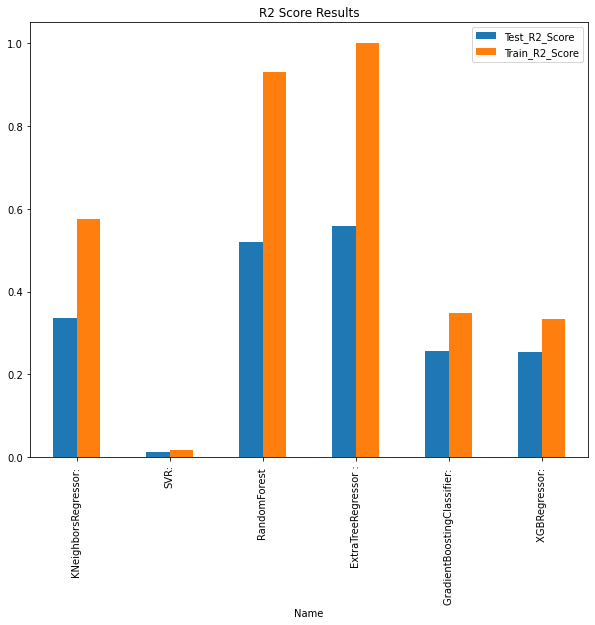

In [30]:
results_df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

# Parameter Tuning

In [ ]:
# Defining optimization parameters for ExtraTreeRegressor

from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)

# Instantiate the grid search model

grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 19.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=40,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_g

In [ ]:
# Tuned parameter set

grid_search.best_params_

{'max_depth': 80, 'max_features': 'log2', 'n_estimators': 250}

In [ ]:
# Best possible parameters for ExtraTreesRegressor

grid_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=80, max_features='log2', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=250, n_jobs=None, oob_score=False,
                    random_state=40, verbose=0, warm_start=False)

In [ ]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(X_train, y_train)

0.9999995922302751

In [ ]:
# R2 score on test set with tuned parameters

grid_search.best_estimator_.score(X_test, y_test)

0.5882474575136674

In [ ]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

67.13230548772465

In [ ]:
# Get sorted list of features in order of importance

feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

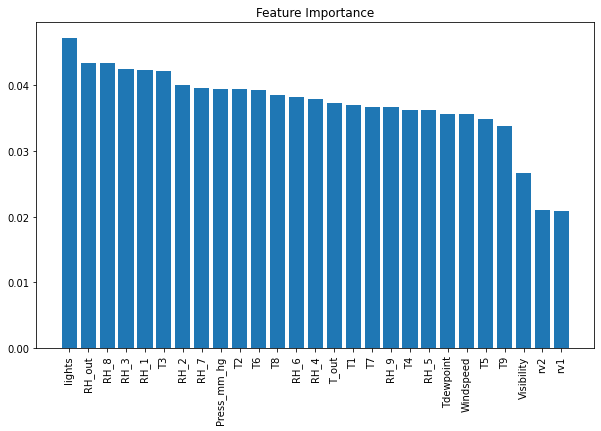

In [ ]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()